# Tutorial 2 Homework
## Active Galactic Nuclei
### MASS S2

Shoaib Shamsi

### Q1
a) To begin, cross-match provided catalog with SDSS to obtain Hβ flux and redshift. Do some exploratory data analysis of the sample: plot redshift and FWHM distribution of the sample, plot i-band magnitude vs. redshift, and describe sample limitations in terms of these plots and parameters (hint: pandas is useful for this).

### A

Submitted the query:

```
SELECT s.specobjid, s.ra, s.dec, s.plate, s.mjd, s.fiberid, s.z,
g.h_beta_flux, g

FROM #upload u
      JOIN SpecObjAll s ON (s.plate=u.up_plate AND s.mjd=u.up_mjd AND s.fiberID=u.up_fiber)
      JOIN GalSpecInfo AS g ON s.specobjid = g.specobjid
```
Using crossmatch, and saved the results in `query0.csv`

In [1]:
import pandas as pd

In [2]:
shen_df = pd.read_csv('shen_subsample_500.csv')
query_df = pd.read_csv('query0.csv', skiprows=[0])

In [3]:
query_df.head()

,specobjid,ra,dec,plate,mjd,fiberid,z,h_beta_flux
0,1451335603323955200,220.51177,43.619106,1289,52734,184,0.231337,874.76070
1,1482837161735645184,192.13969,56.585413,1317,52765,98,0.265798,46.20585
2,2272222206413006848,196.31711,39.217192,2018,53800,568,0.176591,203.92200
3,2357807642618914816,206.90607,30.214521,2094,53851,630,0.117532,1342.06600
4,2382547204050020352,208.81185,29.924557,2116,53854,520,0.297202,150.80580


In [4]:
shen_df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,4399.3,330.1,62.0,3.1,23.06,8.33,0.07,-1.20
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,2371.4,541.6,89.4,8.7,15.06,7.59,0.20,-0.87
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,10756.6,4366.4,32.1,3.4,16.27,9.05,0.35,-2.03
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,15241.3,362.8,118.7,6.3,19.79,9.36,0.02,-2.33
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,1385.6,48.6,52.5,2.9,15.96,7.29,0.03,-0.23


In [5]:
# Let's order these dfs similarly

import numpy as np

shen_ids = shen_df['MJD'].astype(str) + shen_df['Plate'].astype(str) + shen_df['Fiber'].astype(str)
query_ids = query_df['mjd'].astype(str) + query_df['plate'].astype(str) + query_df['fiberid'].astype(str)

shen_indices = np.argsort(shen_ids.astype(int))
query_indices = np.argsort(query_ids.astype(int))

shen_df = shen_df.iloc[shen_indices].reset_index(drop=True)
query_df = query_df.iloc[query_indices].reset_index(drop=True)

In [6]:
shen_df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,218.11798,63.17516,499,9,51988,-23.21,45.425,0.002,42.44,0.05,2523.2,298.3,45.7,4.5,36.81,7.94,0.10,-0.62
1,222.61105,58.66248,608,1,52081,-22.44,45.125,0.003,41.93,0.04,4306.4,4308.9,30.1,3.0,16.49,8.26,0.87,-1.23
2,222.37704,-0.79621,308,43,51662,-23.53,45.393,0.004,42.34,0.02,7204.4,381.7,39.8,2.5,29.27,8.84,0.05,-1.55
3,228.55244,-0.05328,311,26,51665,-22.55,45.007,0.005,42.08,0.02,3820.6,265.0,54.5,2.5,15.77,8.09,0.06,-1.19
4,207.77930,65.52428,497,44,51989,-22.93,45.200,0.001,42.57,0.02,6398.9,3786.5,103.1,5.8,16.41,8.64,0.51,-1.54


In [7]:
query_df.head()

,specobjid,ra,dec,plate,mjd,fiberid,z,h_beta_flux
0,561826560768763904,218.11796,63.175175,499,51988,9,0.214354,649.44460
1,684547453151635456,222.61105,58.662477,608,52081,1,0.210281,59.42062
2,346789018941286400,222.37704,-0.796220,308,51662,43,0.252452,174.62310
3,350162045787727872,228.55242,-0.053255,311,51665,26,0.227828,236.10870
4,559584381698598912,207.77929,65.524292,497,51989,44,0.298761,130.83990


In [8]:
# Let's merge the DFs

df = shen_df.join(query_df)
df = df.drop(['plate', 'mjd', 'fiberid', 'ra', 'dec'], axis=1)
df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,specobjid,z,h_beta_flux
0,218.11798,63.17516,499,9,51988,-23.21,45.425,0.002,42.44,0.05,...,298.3,45.7,4.5,36.81,7.94,0.10,-0.62,561826560768763904,0.214354,649.44460
1,222.61105,58.66248,608,1,52081,-22.44,45.125,0.003,41.93,0.04,...,4308.9,30.1,3.0,16.49,8.26,0.87,-1.23,684547453151635456,0.210281,59.42062
2,222.37704,-0.79621,308,43,51662,-23.53,45.393,0.004,42.34,0.02,...,381.7,39.8,2.5,29.27,8.84,0.05,-1.55,346789018941286400,0.252452,174.62310
3,228.55244,-0.05328,311,26,51665,-22.55,45.007,0.005,42.08,0.02,...,265.0,54.5,2.5,15.77,8.09,0.06,-1.19,350162045787727872,0.227828,236.10870
4,207.77930,65.52428,497,44,51989,-22.93,45.200,0.001,42.57,0.02,...,3786.5,103.1,5.8,16.41,8.64,0.51,-1.54,559584381698598912,0.298761,130.83990


Text(0.5, 0, 'v [km/s]')

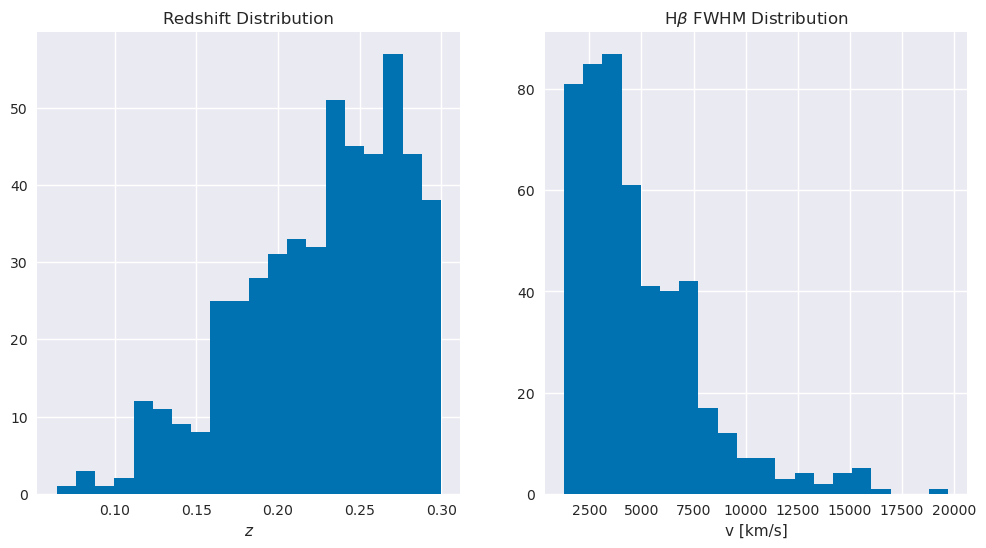

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

fig, axs = plt.subplots(1, 2, figsize=(12,6))

hist_bins = 20

axs[0].hist(df['z'], bins=hist_bins)
axs[0].set_title('Redshift Distribution')
axs[0].set_xlabel('$z$')

axs[1].hist(df['W_BHb_'], bins=hist_bins)
axs[1].set_title('H$\\beta$ FWHM Distribution')
axs[1].set_xlabel('v [km/s]')

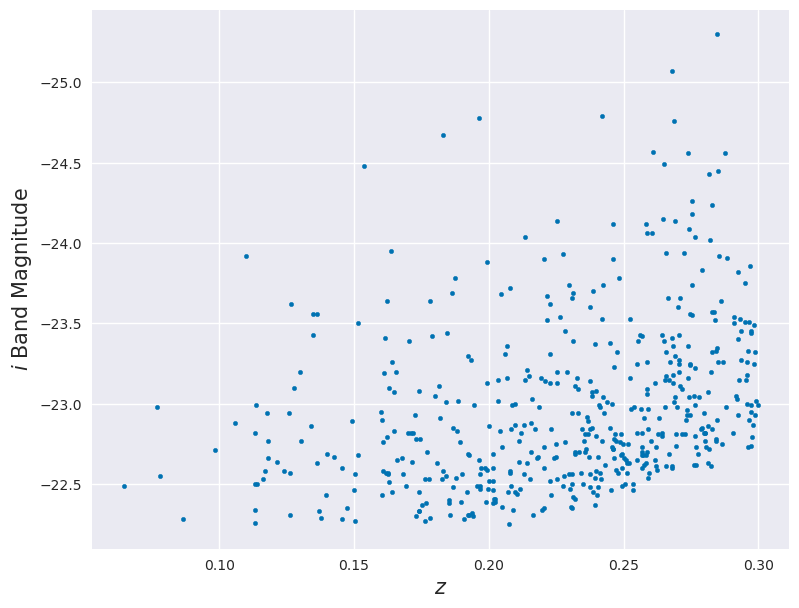

In [10]:
plt.figure(figsize=(9,7))

plt.scatter(df['z'], df['iMAG'], s=10)
plt.xlabel('$z$', size=15)
plt.ylabel('$i$ Band Magnitude', size=15)
plt.gca().invert_yaxis()

From these plots, we can see that the Shen sample is dominated by quasars that are far away and have thin H$\beta$ emission lines. The distance also causes them to be faint.

b) Next, using the provided FWHM and SDSS data, find:
- The luminosity of the Hβ emission line. For this, you will need to calculate the luminosity distance for each object using formulas given by Hogg (2000). For cosmological constants, use ones from Planck ($H_0$=67.8 km/s MPc, $Ω_m$ = 0.31, $Ω_λ$=0.69). Using luminosity distance, Hβ flux and redshift, find the luminosity of the Hβ emission line.

In [11]:
H_0 = 67.8 #km s-1 MPc
c = 299792.458 #km / s
Omega_m = 0.31
Omega_l = 0.69
D_hubble = c / H_0 # MPc

In [12]:
# Let's calculate D_M. Since Omega_k = 0, D_M = D_C is given by:

def calculate_D_M(z):
    return D_hubble * ((2 * np.abs(2 - Omega_m * (1 - z) - (2 - Omega_m) * np.sqrt(1 + Omega_m * z))) / ((1 + z) * Omega_m**2))

df['D_M'] = df['z'].apply(calculate_D_M)

In [13]:
# Let's calculate D_L

def calculate_D_L(z, D_M):
    return (1 + z) * D_M

df['D_L'] = df.apply(lambda row: calculate_D_L(row['z'], row['D_M']), axis=1)
df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,specobjid,z,h_beta_flux,D_M,D_L
0,218.11798,63.17516,499,9,51988,-23.21,45.425,0.002,42.44,0.05,...,4.5,36.81,7.94,0.10,-0.62,561826560768763904,0.214354,649.44460,848.938196,1030.911324
1,222.61105,58.66248,608,1,52081,-22.44,45.125,0.003,41.93,0.04,...,3.0,16.49,8.26,0.87,-1.23,684547453151635456,0.210281,59.42062,834.371650,1009.824405
2,222.37704,-0.79621,308,43,51662,-23.53,45.393,0.004,42.34,0.02,...,2.5,29.27,8.84,0.05,-1.55,346789018941286400,0.252452,174.62310,982.785496,1230.891758
3,228.55244,-0.05328,311,26,51665,-22.55,45.007,0.005,42.08,0.02,...,2.5,15.77,8.09,0.06,-1.19,350162045787727872,0.227828,236.10870,896.770966,1101.080681
4,207.77930,65.52428,497,44,51989,-22.93,45.200,0.001,42.57,0.02,...,5.8,16.41,8.64,0.51,-1.54,559584381698598912,0.298761,130.83990,1139.921486,1480.485797


In [14]:
# Now let's calculate the Luminosities of the H-beta lines

def calculate_L_Hb(row):
    return (4 * np.pi * ((row['D_L'] * 3.08567758128E24)**2) * (row['h_beta_flux'] * 1E-17)) / (1 + row['z'])

df['L_Hb'] = df.apply(lambda row: calculate_L_Hb(row), axis=1)
df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,SN_Hb_,logBH,e_logBH,logEdd,specobjid,z,h_beta_flux,D_M,D_L,L_Hb
0,218.11798,63.17516,499,9,51988,-23.21,45.425,0.002,42.44,0.05,...,36.81,7.94,0.10,-0.62,561826560768763904,0.214354,649.44460,848.938196,1030.911324,6.800650e+41
1,222.61105,58.66248,608,1,52081,-22.44,45.125,0.003,41.93,0.04,...,16.49,8.26,0.87,-1.23,684547453151635456,0.210281,59.42062,834.371650,1009.824405,5.990368e+40
2,222.37704,-0.79621,308,43,51662,-23.53,45.393,0.004,42.34,0.02,...,29.27,8.84,0.05,-1.55,346789018941286400,0.252452,174.62310,982.785496,1230.891758,2.527501e+41
3,228.55244,-0.05328,311,26,51665,-22.55,45.007,0.005,42.08,0.02,...,15.77,8.09,0.06,-1.19,350162045787727872,0.227828,236.10870,896.770966,1101.080681,2.789482e+41
4,207.77930,65.52428,497,44,51989,-22.93,45.200,0.001,42.57,0.02,...,16.41,8.64,0.51,-1.54,559584381698598912,0.298761,130.83990,1139.921486,1480.485797,2.641985e+41


- Using the empirical relation from Section 3 in Wu (2009), calculate black hole mass using the luminosity of the Hβ line and FWHM Hβ. You should elaborate on the assumption you have to make to use this relation.

The 38 CSS objects presented in the paper are radio sources but may not be quasars.

In [15]:
# Let's calculate the BH masses

In [16]:
def calculate_M_BH_Hb(row):
    return 2.4E6 * (row['L_Hb'] / 1E42)**0.59 * (row['W_BHb_'] / 1E3)**2

df['M_BH'] = df.apply(lambda row: calculate_M_BH_Hb(row), axis=1)
df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,logBH,e_logBH,logEdd,specobjid,z,h_beta_flux,D_M,D_L,L_Hb,M_BH
0,218.11798,63.17516,499,9,51988,-23.21,45.425,0.002,42.44,0.05,...,7.94,0.10,-0.62,561826560768763904,0.214354,649.44460,848.938196,1030.911324,6.800650e+41,1.217081e+07
1,222.61105,58.66248,608,1,52081,-22.44,45.125,0.003,41.93,0.04,...,8.26,0.87,-1.23,684547453151635456,0.210281,59.42062,834.371650,1009.824405,5.990368e+40,8.455466e+06
2,222.37704,-0.79621,308,43,51662,-23.53,45.393,0.004,42.34,0.02,...,8.84,0.05,-1.55,346789018941286400,0.252452,174.62310,982.785496,1230.891758,2.527501e+41,5.533434e+07
3,228.55244,-0.05328,311,26,51665,-22.55,45.007,0.005,42.08,0.02,...,8.09,0.06,-1.19,350162045787727872,0.227828,236.10870,896.770966,1101.080681,2.789482e+41,1.649428e+07
4,207.77930,65.52428,497,44,51989,-22.93,45.200,0.001,42.57,0.02,...,8.64,0.51,-1.54,559584381698598912,0.298761,130.83990,1139.921486,1480.485797,2.641985e+41,4.480854e+07


- Estimate the Eddington luminosity and Eddington ratio after having derived the bolometric luminosity (e.g., use empirical relations from Wu 2009).

In [17]:
# Let's calculate the bolometric luminosity

df['log_L_Hb'] = df['L_Hb'].apply(lambda x: np.log10(x))
df['log_L_bol'] = df['log_L_Hb'].apply(lambda x: 0.94 * x + 5.39)
df['L_bol'] = df['log_L_bol'].apply(lambda x: 10**x)
df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,specobjid,z,h_beta_flux,D_M,D_L,L_Hb,M_BH,log_L_Hb,log_L_bol,L_bol
0,218.11798,63.17516,499,9,51988,-23.21,45.425,0.002,42.44,0.05,...,561826560768763904,0.214354,649.44460,848.938196,1030.911324,6.800650e+41,1.217081e+07,41.832550,44.712597,5.159379e+44
1,222.61105,58.66248,608,1,52081,-22.44,45.125,0.003,41.93,0.04,...,684547453151635456,0.210281,59.42062,834.371650,1009.824405,5.990368e+40,8.455466e+06,40.777454,43.720806,5.257827e+43
2,222.37704,-0.79621,308,43,51662,-23.53,45.393,0.004,42.34,0.02,...,346789018941286400,0.252452,174.62310,982.785496,1230.891758,2.527501e+41,5.533434e+07,41.402691,44.308530,2.034838e+44
3,228.55244,-0.05328,311,26,51665,-22.55,45.007,0.005,42.08,0.02,...,350162045787727872,0.227828,236.10870,896.770966,1101.080681,2.789482e+41,1.649428e+07,41.445524,44.348792,2.232504e+44
4,207.77930,65.52428,497,44,51989,-22.93,45.200,0.001,42.57,0.02,...,559584381698598912,0.298761,130.83990,1139.921486,1480.485797,2.641985e+41,4.480854e+07,41.421930,44.326615,2.121361e+44


In [18]:
# Let's calculate the Eddington luminosity and ratio

df['L_edd'] = df['M_BH'].apply(lambda x: 1.38E38 * x)
df['edd_ratio'] = df['L_bol'] / df['L_edd']
df.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,h_beta_flux,D_M,D_L,L_Hb,M_BH,log_L_Hb,log_L_bol,L_bol,L_edd,edd_ratio
0,218.11798,63.17516,499,9,51988,-23.21,45.425,0.002,42.44,0.05,...,649.44460,848.938196,1030.911324,6.800650e+41,1.217081e+07,41.832550,44.712597,5.159379e+44,1.679571e+45,0.307184
1,222.61105,58.66248,608,1,52081,-22.44,45.125,0.003,41.93,0.04,...,59.42062,834.371650,1009.824405,5.990368e+40,8.455466e+06,40.777454,43.720806,5.257827e+43,1.166854e+45,0.045060
2,222.37704,-0.79621,308,43,51662,-23.53,45.393,0.004,42.34,0.02,...,174.62310,982.785496,1230.891758,2.527501e+41,5.533434e+07,41.402691,44.308530,2.034838e+44,7.636139e+45,0.026647
3,228.55244,-0.05328,311,26,51665,-22.55,45.007,0.005,42.08,0.02,...,236.10870,896.770966,1101.080681,2.789482e+41,1.649428e+07,41.445524,44.348792,2.232504e+44,2.276210e+45,0.098080
4,207.77930,65.52428,497,44,51989,-22.93,45.200,0.001,42.57,0.02,...,130.83990,1139.921486,1480.485797,2.641985e+41,4.480854e+07,41.421930,44.326615,2.121361e+44,6.183578e+45,0.034306


c) How would you describe these AGNs based on the properties you found? Provide histograms of obtained black hole masses and Eddington ratios. Present your results as in Figure 2 from Wu (2009), and Figure 7 from McLure & Dunlop (2002), or on any plots that you find appropriate to illustrate your conclusions.

Text(0.5, 0, '$L_{bol}/L_{Edd}$')

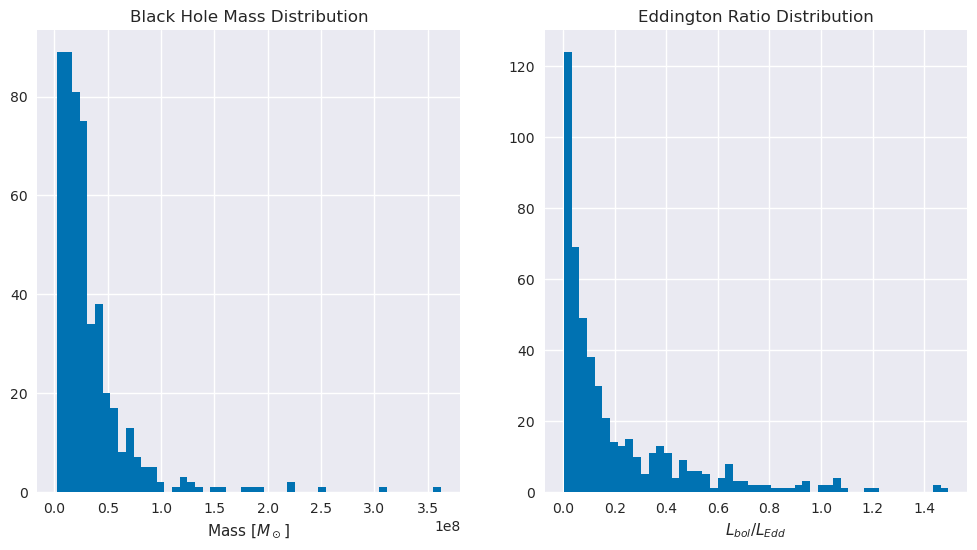

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

hist_bins = 50

axs[0].hist(df['M_BH'], bins=hist_bins)
axs[0].set_title('Black Hole Mass Distribution')
axs[0].set_xlabel('Mass [$M_\\odot$]')

axs[1].hist(df['edd_ratio'], bins=hist_bins)
axs[1].set_title('Eddington Ratio Distribution')
axs[1].set_xlabel('$L_{bol}/L_{Edd}$')

Text(0, 0.5, '$\\log{L_{bol}}$ [erg s$^{-1}$]')

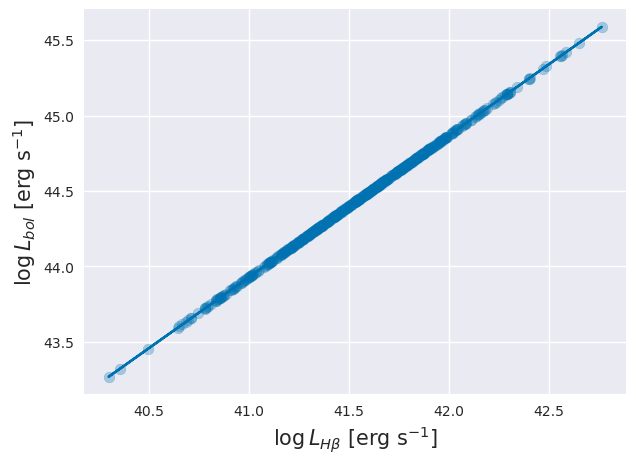

In [20]:
plt.figure(figsize=(7,5))

plt.scatter(df['log_L_Hb'], df['log_L_bol'], s=60, alpha=0.3)

a, b = np.polyfit(df['log_L_Hb'], df['log_L_bol'], 1)
plt.plot(df['log_L_Hb'], a * df['log_L_Hb'] + b)

plt.xlabel('$\\log{L_{H\\beta}}$ [erg s$^{-1}$]', size=15)
plt.ylabel('$\\log{L_{bol}}$ [erg s$^{-1}$]', size=15)

These BHs are about $10^8 M_\odot$, about the size of the Milky Way.

### Q2

In this part of the assignment you will learn how to estimate black hole mass from galactic host bulge luminosity. It is useful in cases when you don’t have spectroscopic data for broad emission lines. Calculate black hole mass for at least 10 objects from Wu (2009) using the relation between black hole mass and host galaxy absolute magnitude in the R band given in Wu (2009) and proposed by McLure & Dunlop (2002). Elaborate on the assumptions you have to make in order to use this relation. You will need to obtain magnitudes in Johnson- Cousins photometric system (e.g., you can try searching the NED database). Additionally, find the Eddington ratio and plot it against obtained black hole masses.

In [21]:
wu_df = pd.read_table('simbad.tsv', sep='\t', skiprows=range(17))
wu_df = wu_df.drop(wu_df.tail(1).index)
wu_df = wu_df.drop(wu_df.head(1).index)
wu_df = wu_df.drop(['# '], axis=1)

wu_df['R'] = pd.to_numeric(wu_df['  Mag R  '], errors='coerce')
wu_df['V'] = pd.to_numeric(wu_df['  Mag V  '], errors='coerce')
wu_df['z'] = pd.to_numeric(wu_df['  redshift  '], errors='coerce')
wu_df = wu_df.dropna(ignore_index=True)

wu_df

,obj tags,obj count,raw id,identifier,typ,"coord1 (ICRS,J2000/2000)",rv/z,radvel,redshift,cz,...,Mag B,Mag V,Mag R,Mag I,spec. type,#bib,#not,R,V,z
0,d,1,RX J0134-4258,2MASS J01341690-4258262,Sy1,01 34 16.9072341600 -42 58 26.223391344,cz 71091.0,62849,0.23713,71091.0,...,18.17,17.30,16.71,~,~,76,1,16.710,17.30,0.237130
1,d,1,3C 67,7C 022118.10+273638.00,Sy1,02 24 12.2865158736 +27 50 11.538285648,z 0.310101,79062,0.310101,92965.94,...,19.502,18,18.263,~,~,209,1,18.263,18.00,0.310101
2,d,1,3C 138,ICRF J052109.8+163822,Sy1,05 21 09.88596258 +16 38 22.0515459,z 0.76,153467,0.76,227842,...,19.37,18.84,18.480,~,~,857,1,18.480,18.84,0.760000
3,d,1,3C 147,ICRF J054236.1+495107,Sy1,05 42 36.13789710 +49 51 07.2337139,z 0.55,123574,0.55,164886,...,18.45,17.80,17.210,~,~,1502,1,17.210,17.80,0.550000
4,d,1,3C 186,3C 186,QSO,07 44 17.4720658920 +37 53 17.250697320,z 1.06551,185940,1.06551,319431.9,...,17.5,18.14,17.2,~,~,325,1,17.200,18.14,1.065510
5,d,1,3C 190,3C 190,QSO,08 01 33.5525166480 +14 14 42.813906612,z 0.24639,64982,0.24639,73865.9,...,21.07,20.26,18.972,~,~,243,2,18.972,20.26,0.246390
6,d,1,3C 213.1,3C 213.1,AGN,09 01 05.2614565176 +29 01 46.939089828,z 0.19405,52618,0.19405,58174.7,...,18.84,18.08,18.600,~,~,125,1,18.600,18.08,0.194050
7,d,1,3C 216,ICRF J090933.4+425346,Sy2,09 09 33.49714902 +42 53 46.4821036,z 0.67002,141547,0.67002,200866.9,...,19.98,19.42,18.220,~,~,505,1,18.220,19.42,0.670020
8,d,1,B 1144+3517,ICRF J114722.1+350107,Sy2,11 47 22.1297825184 +35 01 07.538786184,z 0.06289,18262,0.06289,18853.9,...,17.89,16.83,10.26,~,~,174,1,10.260,16.83,0.062890
9,d,1,3C 268.3,3C 268.3,Sy1,12 06 24.70656 +64 13 36.8760,z 0.37116,91609,0.37116,111271.0,...,21.847,20.790,19.910,~,~,190,1,19.910,20.79,0.371160


In [27]:
# Let's calculate the masses

wu_df['D_M'] = wu_df['z'].apply(calculate_D_M)
wu_df['D_L'] = wu_df.apply(lambda row: calculate_D_L(row['z'], row['D_M']), axis=1)

wu_df['ABS_R'] = wu_df.apply(lambda row: row['R'] - 5 * np.log10(row['D_L'] * 1E6) + 5, axis=1)
wu_df['ABS_V'] = wu_df.apply(lambda row: row['V'] - 5 * np.log10(row['D_L'] * 1E6) + 5, axis=1)

wu_df['log_M_BH'] = -0.5 * wu_df['ABS_R'] - 2.74
wu_df['M_BH'] = 10**wu_df['log_M_BH']
wu_df.head()

,obj tags,obj count,raw id,identifier,typ,"coord1 (ICRS,J2000/2000)",rv/z,radvel,redshift,cz,...,V,z,D_M,D_L,ABS_R,ABS_V,M_BH,log_M_BH,L_V,L_bol
0,d,1,RX J0134-4258,2MASS J01341690-4258262,Sy1,01 34 16.9072341600 -42 58 26.223391344,cz 71091.0,62849,0.23713,71091.0,...,17.30,0.237130,929.472474,1149.878281,-23.593259,-23.003259,1.139278e+09,9.056630,4.789322e+44,4.789322e+45
1,d,1,3C 67,7C 022118.10+273638.00,Sy1,02 24 12.2865158736 +27 50 11.538285648,z 0.310101,79062,0.310101,92965.94,...,18.00,0.310101,1177.526819,1542.679063,-22.678378,-22.941378,3.973644e+08,8.599189,4.523988e+44,4.523988e+45
2,d,1,3C 138,ICRF J052109.8+163822,Sy1,05 21 09.88596258 +16 38 22.0515459,z 0.76,153467,0.76,227842,...,18.84,0.760000,2459.398765,4328.541826,-24.701708,-24.341708,4.081822e+09,9.610854,1.643060e+45,1.643060e+46
3,d,1,3C 147,ICRF J054236.1+495107,Sy1,05 42 36.13789710 +49 51 07.2337139,z 0.55,123574,0.55,164886,...,17.80,0.550000,1905.471848,2953.481364,-25.141671,-24.551671,6.773850e+09,9.830836,1.993603e+45,1.993603e+46
4,d,1,3C 186,3C 186,QSO,07 44 17.4720658920 +37 53 17.250697320,z 1.06551,185940,1.06551,319431.9,...,18.14,1.065510,3166.747085,6540.947772,-26.878203,-25.938203,5.001516e+10,10.699102,7.149105e+45,7.149105e+46


In [28]:
# Find the optical band (V) luminosity

wu_df['L_V'] = wu_df['ABS_V'].apply(lambda x: 3.0128E+35 * 10**(-0.4 * x))
wu_df['L_bol'] = wu_df['L_V'] * 10
wu_df['L_edd'] = wu_df['M_BH'].apply(lambda x: 1.38E38 * x)
wu_df['edd_ratio'] = wu_df['L_bol'] / wu_df['L_edd']
wu_df.head()

,obj tags,obj count,raw id,identifier,typ,"coord1 (ICRS,J2000/2000)",rv/z,radvel,redshift,cz,...,D_M,D_L,ABS_R,ABS_V,M_BH,log_M_BH,L_V,L_bol,L_edd,edd_ratio
0,d,1,RX J0134-4258,2MASS J01341690-4258262,Sy1,01 34 16.9072341600 -42 58 26.223391344,cz 71091.0,62849,0.23713,71091.0,...,929.472474,1149.878281,-23.593259,-23.003259,1.139278e+09,9.056630,4.789322e+44,4.789322e+45,1.572204e+47,0.030462
1,d,1,3C 67,7C 022118.10+273638.00,Sy1,02 24 12.2865158736 +27 50 11.538285648,z 0.310101,79062,0.310101,92965.94,...,1177.526819,1542.679063,-22.678378,-22.941378,3.973644e+08,8.599189,4.523988e+44,4.523988e+45,5.483629e+46,0.082500
2,d,1,3C 138,ICRF J052109.8+163822,Sy1,05 21 09.88596258 +16 38 22.0515459,z 0.76,153467,0.76,227842,...,2459.398765,4328.541826,-24.701708,-24.341708,4.081822e+09,9.610854,1.643060e+45,1.643060e+46,5.632914e+47,0.029169
3,d,1,3C 147,ICRF J054236.1+495107,Sy1,05 42 36.13789710 +49 51 07.2337139,z 0.55,123574,0.55,164886,...,1905.471848,2953.481364,-25.141671,-24.551671,6.773850e+09,9.830836,1.993603e+45,1.993603e+46,9.347913e+47,0.021327
4,d,1,3C 186,3C 186,QSO,07 44 17.4720658920 +37 53 17.250697320,z 1.06551,185940,1.06551,319431.9,...,3166.747085,6540.947772,-26.878203,-25.938203,5.001516e+10,10.699102,7.149105e+45,7.149105e+46,6.902093e+48,0.010358


<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_19545/2690191913.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Black Hole Mass [$\\log{M_{\odot}}$]', size=15)


Text(0, 0.5, 'Eddington Ratio/')

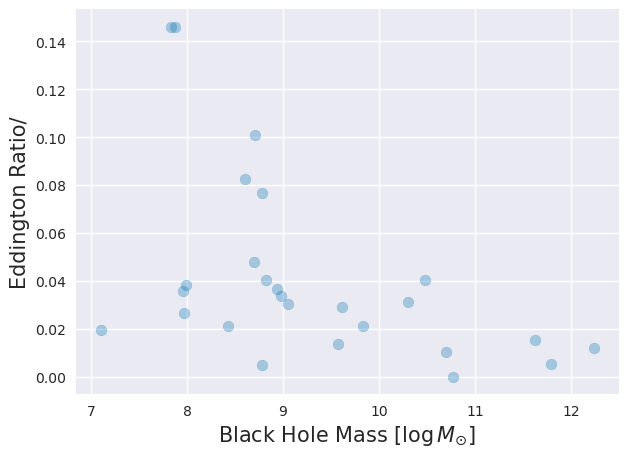

In [32]:
plt.figure(figsize=(7,5))

plt.scatter(wu_df['log_M_BH'], wu_df['edd_ratio'], s=60, alpha=0.3)

plt.xlabel('Black Hole Mass [$\\log{M_{\odot}}$]', size=15)
plt.ylabel('Eddington Ratio/', size=15)

Text(0.5, 0, '$L_{bol}/L_{Edd}$')

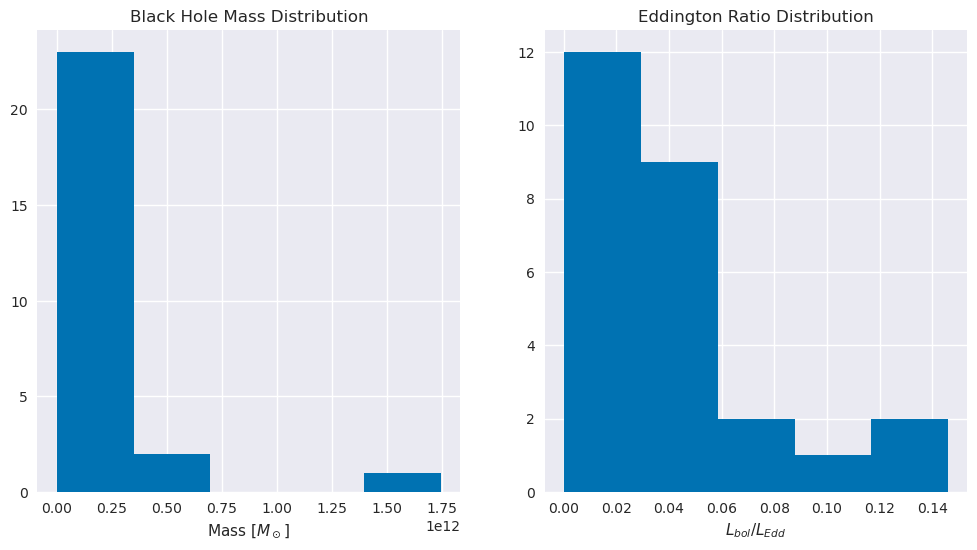

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

hist_bins = 5

axs[0].hist(wu_df['M_BH'], bins=hist_bins)
axs[0].set_title('Black Hole Mass Distribution')
axs[0].set_xlabel('Mass [$M_\\odot$]')

axs[1].hist(wu_df['edd_ratio'], bins=hist_bins)
axs[1].set_title('Eddington Ratio Distribution')
axs[1].set_xlabel('$L_{bol}/L_{Edd}$')

The biggest assumption here is that we are using absolute magnitudes for the whole galaxy as the magnitude for the bulge. We assume that the bulge dominates in luminosity.